<a href="https://colab.research.google.com/github/hannahcyrus/musicRecommedation_AI_ML/blob/main/music_recom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from youtubesearchpython import VideosSearch




In [86]:
data = pd.read_csv('/content/drive/MyDrive/ai_ml/project/spotify_songs.csv')
data = data[data['language'] == 'en']
data.drop(columns=['language', 'playlist_name', 'playlist_id'], inplace=True)
data = data.drop_duplicates(subset=['track_name', 'track_artist'])
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], infer_datetime_format=True)
data = data.sort_values(by=['track_album_release_date'])
data.reset_index(drop=True, inplace=True)
print(data.columns)
songs_count = data.shape[0]
print(songs_count)

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')
13726


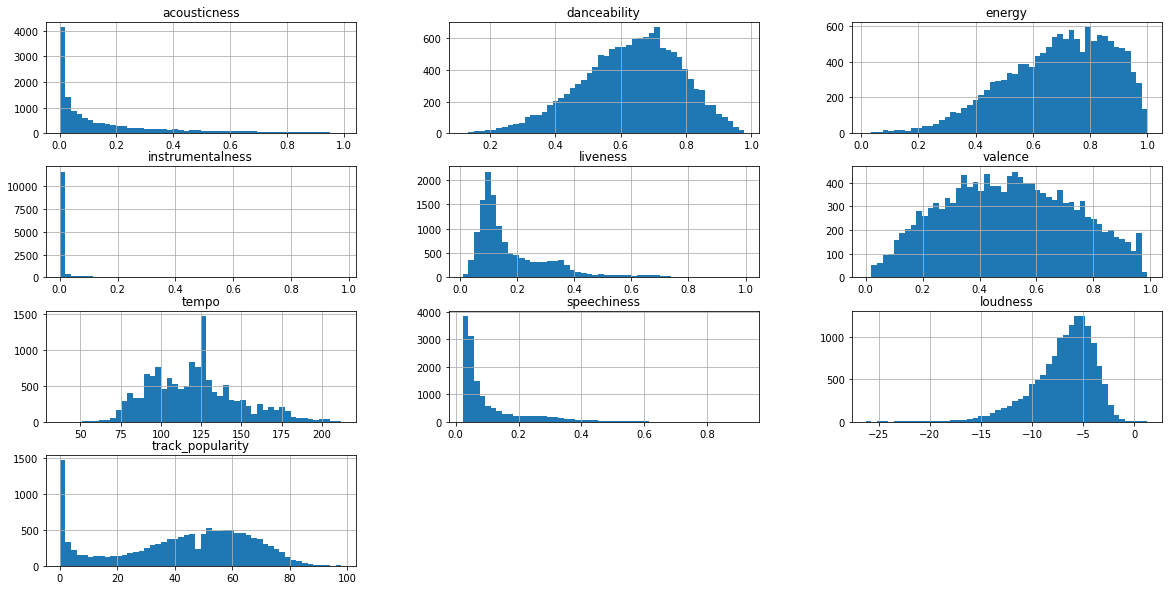

In [103]:
data[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness','valence', 'tempo','speechiness', 'loudness','track_popularity']].hist(bins=50,figsize=(20,10))
plt.show()


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(data["track_artist"]).toarray()

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [89]:
data


,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,7DJsL4jyXA39GDiHFQYQ0t,Mess Around,Ray Charles,"Ah, you can talk about the pit barbecue The ba...",59,0cw6Sv7IwZ87aLPPvNPSd0,"Ray Charles (aka: Hallelujah, I Love Her So)",1957-01-01,r&b,urban contemporary,...,8,-2.981,1,0.0640,0.437000,0.000000,0.0560,0.906,148.808,160227
1,6qb0O5HW7H4q6R0AbP38Ko,Long Tall Sally (The Thing),Little Richard,Going to tell Aunt Mary about Uncle John He cl...,1,4CfyfJWb1HSabAjdcLeThs,Here's Little Richard [Remastered & Expanded],1957-03-01,rock,classic rock,...,5,-5.023,1,0.0973,0.768000,0.000000,0.0841,0.917,184.484,131853
2,4gphxUgq0JSFv2BCLhNDiE,Jailhouse Rock,Elvis Presley,The warden threw a party in the county jail Th...,73,0C3t1htEDTFKcg7F2rNbek,Elvis' Golden Records,1958-03-21,rock,classic rock,...,10,-9.538,0,0.0755,0.410000,0.000002,0.0715,0.915,167.396,146480
3,7jER4hFurkqwYmeat3qsh5,Jingle Bells,Ella Fitzgerald,Dashing through the snow In a one-horse open s...,11,15up0e6AFIYZbmErIVPU3p,Ella Wishes You A Swinging Christmas (Expanded...,1960-01-01,r&b,neo soul,...,7,-6.295,1,0.0757,0.730000,0.000000,0.7270,0.876,119.117,142547
4,0CmIALzGn4vHIHJG4n3Q4z,At Last - Single Version,Etta James,I was never spellbound by a starry sky What is...,25,2pBhXw3Hi1hBf8FpAtE101,At Last!,1960-01-01,r&b,urban contemporary,...,5,-9.981,1,0.0324,0.721000,0.000600,0.3160,0.322,174.794,182400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13721,5l2U8f2VuOCXYS501z4cOw,Best Days,Fuzo,INTRO - 30 Seconds Summer Nights Flashing Ligh...,1,0ebxsCtTVEiZS1iop4Ytsm,Best Days,2020-01-17,edm,big room,...,8,-2.213,0,0.1410,0.143000,0.868000,0.2050,0.219,125.996,187619
13722,7FIWs0pqAYbP91WWM0vlTQ,Godzilla (feat. Juice WRLD),Eminem,"Ugh, you're a monster I can swallow a bottle o...",79,4otkd9As6YaxxEkIjXPiZ6,Music To Be Murdered By,2020-01-17,pop,dance pop,...,10,-5.260,0,0.3420,0.145000,0.000000,0.2920,0.829,165.995,210800
13723,3JAqEYLvkXUECDgWgY3SBv,In My Mind,The Amazons,No you can't reach me on my phone No you can't...,7,1kLPf4HFRPS0NOFGXDsRR2,Introducing… The Amazons,2020-01-17,rock,permanent wave,...,0,-4.207,0,0.0677,0.000102,0.003970,0.0719,0.546,155.046,230625
13724,35Ycb1cMPK6tyNMsTepijg,Dead Man Walking (feat. Future),2 Chainz,I see dead men walking Buddah Bless this beat ...,63,5v7NpK7CAZ6IDdKiUXCtAl,Dead Man Walking,2020-01-17,rap,hip hop,...,5,-5.425,0,0.1570,0.040100,0.000000,0.1480,0.535,150.024,135507


In [90]:
def recommend(song):
    index = data[data['track_name'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(data.iloc[i[0]].track_name)
        

In [91]:
recommend("Godzilla (feat. Juice WRLD)")

Guilty Conscience
Stan
Bitch Please II
Cleanin' Out My Closet
'Till I Collapse


In [92]:
def get_metadata(track_index):
    return data.iloc[track_index][['track_name', 'track_artist', 'lyrics']].to_dict()

In [93]:
def get_by_same_artist(track_index, count):
    return data[data['track_artist'] == data.iloc[track_index]['track_artist']].drop(track_index)[:count]
    

In [94]:
import pickle
pickle.dump(data,open('song_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [95]:
%%writefile app.py
from youtubesearchpython import VideosSearch
import pickle
import streamlit as st
import requests
def get_metadata(track_index):
    return songss.iloc[track_index][['track_name', 'track_artist', 'lyrics']].to_dict()
def change_song(index):
   st.session_state['current_song_index'] = index    


def recommend(song):
    index = songss[songss['track_name'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_song_names = []
    for i in distances[1:6]:
        
        #track_id = songss.iloc[i[0]].track_id
        
        recommended_song_names.append(songss.iloc[i[0]].track_name)

    return recommended_song_names


st.header('Music Recommender System')
songss = pickle.load(open('song_list.pkl','rb'))
similarity = pickle.load(open('similarity.pkl','rb'))

song_list = songss['track_name'].values
selected_song= st.selectbox(
    "Type or select a song from the dropdown",
    song_list
)

if st.button('Show Recommendation'):
    recommended_song_names = recommend(selected_song)
    with st.container():
            st.write(recommended_song_names[0])
            st.write(recommended_song_names[1])
            st.write(recommended_song_names[2])
            st.write(recommended_song_names[3])
            st.write(recommended_song_names[4])
           # st.button("listen", key=str(recommended_song_names[0]), on_click=change_song, args=(recommended_song_names['index'],))

      

if 'current_song_index' not in st.session_state:
    change_song(1234)
current_song = get_metadata(st.session_state['current_song_index'])    
#st.write(f'## {selected_song["track_name"]} - {selected_song["track_artist"]}')

youtube_search = VideosSearch( selected_song, limit = 1)
youtube_id = youtube_search.result()['result'][0]['id'] # getting youtube link
thumbnail_url = youtube_search.result()['result'][0]['thumbnails'][0]['url'] # getting youtube thumbnail

st.write(f'[![YouTube thumbnail]({thumbnail_url})](https://www.youtube.com/watch?v={youtube_id})')
st.write(f'[Hear on YouTube](https://www.youtube.com/watch?v={youtube_id})')        


Overwriting app.py


In [96]:
!streamlit run app.py & npx localtunnel --port 8501


2022-05-31 12:31:13.714 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.73.96.47:8501

npx: installed 22 in 2.863s
your url is: https://cruel-singers-deny-34-73-96-47.loca.lt
tcmalloc: large alloc 1507229696 bytes == 0x7f02000 @  0x7ff494e0e1e7 0x4a3940 0x5b438c 0x5d0ccd 0x5939af 0x5957cf 0x595b69 0x4ee13a 0x55b1e8 0x55d60d 0x5df9b8 0x5936cc 0x548c51 0x51566f 0x549576 0x604173 0x62a809 0x59358d 0x515244 0x593dd7 0x511e2c 0x4bc98a 0x59c019 0x595ef6 0x5134a6 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x4bc98a 0x59c019
tcmalloc: large alloc 1507229696 bytes == 0x61c6a000 @  0x7ff494e0e1e7 0x4a3940 0x5b438c 0x55b1fa 0x55d60d 0x5df9b8 0x5936cc 0x548c51 0x51566f 0x549576 0x604173 0x62a809 0x59358d 0x515244 0x593dd7 0x511e2c 0x4bc98a 0x59c019 0x595ef6 0x5134a6 0x593dd7 0x511e2c 0x593dd7 0x511e2c 0x4bc98a 0x59c019 0x595ef6 0x5d5393 0x5e3137 0x7ff4947d26db 0x7ff494b0b61f
tcm

In [97]:
!pip install streamlit --quiet


In [98]:
!pip install youtube_search_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
